In [1]:
import requests
import pytz
import datetime
import numpy as np
import re
import editdistance
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.misc import imread
import matplotlib.image as mpimg
import requests
import math
import os
import io
from nltk.tokenize import sent_tokenize
import warnings
import pickle

warnings.filterwarnings("ignore")
import matplotlib as mpl
mpl.rcParams['grid.linestyle'] = ':'

%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


# **–ê–Ω–∞–ª–∏–∑ –∑–∞–∫—Ä—ã—Ç–∏—è –º–µ—Ç—Ä–æ –°–ü–± –∑–∞ 2018 –≥–æ–¥**

**–í–æ–ø—Ä–æ—Å—ã —Ç–µ –∂–µ, —á—Ç–æ –∏ –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É:**

* –∫–∞–∫ —á–∞—Å—Ç–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É –∫–∞–∫–∏–µ —Å—Ç–∞–Ω—Ü–∏–∏?
* –Ω–∞ —Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –∫–∞–∫–∞—è?
* —Å–∫–æ–ª—å–∫–æ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º –∏ –ø–æ—Å—Ç–æ–º –≤ —Ç–µ–ª–µ–≥—Ä–∞–º–µ
* –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫—Ä—ã—Ç—ã—Ö –∑–∞ –¥–µ–Ω—å?

## Mining

–ö–ª–∏–µ–Ω—Ç –¥–ª—è –¢–µ–ª–µ–≥—Ä–∞–º–∞, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã–≥—Ä—É–∂–∞—Ç—å –∏—Å—Ç–æ—Ä–∏—é –∏ –∫–ª—é—á–∏ –∫ API:

In [ ]:
from telethon import TelegramClient
# https://github.com/LonamiWebs/Telethon

# These example values won't work. You must get your own api_id and
# api_hash from https://my.telegram.org, under API Development.
api_id = 107415
api_hash = '30f9d912c13f82700fd844'
phone = '+79215228367'

–¢–µ–ø–µ—Ä—å –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å SOCKS –ø—Ä–æ–∫—Å–∏ –∏ —Å—Ç–∞—Ä—É—é –≤–µ—Ä—Å–∏—é –∫–ª–∏–µ–Ω—Ç–∞, —á—Ç–æ–±—ã –ø–æ–¥–∫–ª—é—á–∏—Ç—å—Å—è:

In [2]:
import telethon
print(telethon.__version__)

0.19.1.6


In [3]:
from telethon import TelegramClient
import socks
# https://github.com/LonamiWebs/Telethon

client = TelegramClient('session_name_closed', api_id, api_hash, proxy=(socks.SOCKS4, '80.94.22.55', 4145))
client.connect()

True

–ö–æ–¥ –¥–ª—è –∞–≤—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏:

In [5]:
client.send_code_request(phone)

In [6]:
# If you already have a previous 'session_name.session' file, skip this.
me = client.sign_in(code=39006)  # Put whatever code you received here.

In [7]:
client.is_user_authorized()

True

–ó–∞–≥—Ä—É–∂–∞–µ–º –∏–∑ –∫–∞–Ω–∞–ª–∞ —Å–æ–æ–±—â–µ–Ω–∏—è:

In [24]:
orig_messages = client.get_message_history('@spbmetro', limit=None)
len(orig_messages)

2102

In [2]:
user_timezone = pytz.timezone('Europe/Moscow')

In [27]:
for i in range(1005, 1020):
    msg = orig_messages[-i]
    print(pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S") + ' ' + msg.message)

2017-12-28 14:41:08 –í 14-27 —Å—Ç. –°—Ç–∞—Ä–∞—è –¥–µ—Ä–µ–≤–Ω—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 15:46:57 –í 14-44 —Å—Ç. –°—Ç–∞—Ä–∞—è –¥–µ—Ä–µ–≤–Ω—è –æ—Ç–∫—Ä—ã—Ç–∞. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ
2017-12-28 16:51:24 –í 16-33 —Å—Ç. –ü—É—à–∫–∏–Ω—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 17:05:36 –í 17-03 —Å—Ç. –ü—É—à–∫–∏–Ω—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ
2017-12-28 17:22:03 –í 17-18 –≤–µ—Å—Ç–∏–±—é–ª—å 1 —Å—Ç. –°–ø–æ—Ä—Ç–∏–≤–Ω–∞—è –∑–∞–∫—Ä—ã—Ç –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 17:44:45 –í 17-34 —Å—Ç. –ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç. –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –∑–∞–∫—Ä—ã—Ç—ã –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞
2017-12-28 17:49:26 –í 17-47 —Å—Ç. –ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç. –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –æ—Ç–∫—Ä—ã—Ç—ã. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥

–°–æ—Ö—Ä–∞–Ω–∏–º –∏—Ö (–æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å–ø–∏—Å–æ–∫ –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ—Å—Ç–æ –ø–µ—Ä–µ–≥–æ–Ω–∏–º –≤ —Å–∞–º–æ–ø–∏—Å–Ω—ã–π –∫–ª–∞—Å—Å):

In [3]:
class Msg():
    def __init__(self, msg):
        self.date = msg.date
        self.message = msg.message
        self.views = msg.views

In [44]:
data = []
for i in range(3, len(orig_messages)): #because 2 are not Messages
    msg = orig_messages[-i]
    data.append(Msg(msg))

with open('./data/data_till_2019.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open('./data/data_till_2019.pickle', 'rb') as handle:
    orig_messages = pickle.load(handle)

–ó–∞ 2018 –≥–æ–¥:

In [5]:
dates = np.array([l.date.date() for l in orig_messages])
y2018 = np.where((dates >= datetime.date(2018, 1, 1)) & (dates < datetime.date(2019, 1, 1)))
messages = orig_messages[y2018[0][0] : y2018[0][-1]]
print(len(messages))

1049


In [6]:
corpora = [msg.message for msg in messages]
dates = [pytz.utc.localize(msg.date).astimezone(user_timezone) for msg in messages]

In [7]:
#read metro stations list
stations = []
f = open('stations.txt', 'r')
for line in f.readlines():
    stations.append(line.replace('\n', ''))
print(len(stations))

69


In [8]:
print(stations)

['–ê–≤—Ç–æ–≤–æ', '–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è', '–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è', '–ë–∞–ª—Ç–∏–π—Å–∫–∞—è', '–ë—É—Ö–∞—Ä–µ—Å—Ç—Å–∫–∞—è', '–í–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Å–∫–∞—è', '–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è', '–í–æ–ª–∫–æ–≤—Å–∫–∞—è', '–í—ã–±–æ—Ä–≥—Å–∫–∞—è', '–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è', '–ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä', '–ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–î–µ–≤—è—Ç–∫–∏–Ω–æ', '–î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è', '–ï–ª–∏–∑–∞—Ä–æ–≤—Å–∫–∞—è', '–ó–≤—ë–∑–¥–Ω–∞—è', '–ó–≤–µ–Ω–∏–≥–æ—Ä–æ–¥—Å–∫–∞—è', '–ö–∏—Ä–æ–≤—Å–∫–∏–π –∑–∞–≤–æ–¥', '–ö–æ–º–µ–Ω–¥–∞–Ω—Ç—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–ö—Ä–µ—Å—Ç–æ–≤—Å–∫–∏–π –æ—Å—Ç—Ä–æ–≤', '–ö—É–ø—á–∏–Ω–æ', '–õ–∞–¥–æ–∂—Å–∫–∞—è', '–õ–µ–Ω–∏–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–õ–µ—Å–Ω–∞—è', '–õ–∏–≥–æ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è', '–ú–∞—è–∫–æ–≤—Å–∫–∞—è', '–ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω–∞—è', '–ú–æ—Å–∫–æ–≤—Å–∫–∞—è', '–ú–æ—Å–∫–æ–≤—Å–∫–∏–µ –≤–æ—Ä–æ—Ç–∞', '–ù–∞—Ä–≤—Å–∫–∞—è', '–ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç', '–ù–æ–≤–æ—á–µ—Ä–∫–∞—Å—Å–∫–∞—è', '–û–±–≤–æ–¥–Ω—ã–π –∫–∞–Ω–∞–ª', '–û–±—É—Ö–æ–≤–æ

–ò—Å–∫–∞—Ç—å –±—É–¥–µ–º –ø–æ —Å–∏–≥–Ω–∞—Ç—É—Ä–∞–º:

In [9]:
signatures = [' '.join([w[:6] for w in l.lower().split(' ') ]) for l in stations]
len(set(signatures))

69

In [10]:
print(signatures)

['–∞–≤—Ç–æ–≤–æ', '–∞–¥–º–∏—Ä–∞', '–∞–∫–∞–¥–µ–º', '–±–∞–ª—Ç–∏–π', '–±—É—Ö–∞—Ä–µ', '–≤–∞—Å–∏–ª–µ', '–≤–ª–∞–¥–∏–º', '–≤–æ–ª–∫–æ–≤', '–≤—ã–±–æ—Ä–≥', '–≥–æ—Ä—å–∫–æ', '–≥–æ—Å—Ç–∏–Ω –¥–≤–æ—Ä', '–≥—Ä–∞–∂–¥–∞ –ø—Ä–æ—Å–ø–µ', '–¥–µ–≤—è—Ç–∫', '–¥–æ—Å—Ç–æ–µ', '–µ–ª–∏–∑–∞—Ä', '–∑–≤—ë–∑–¥–Ω', '–∑–≤–µ–Ω–∏–≥', '–∫–∏—Ä–æ–≤—Å –∑–∞–≤–æ–¥', '–∫–æ–º–µ–Ω–¥ –ø—Ä–æ—Å–ø–µ', '–∫—Ä–µ—Å—Ç–æ –æ—Å—Ç—Ä–æ–≤', '–∫—É–ø—á–∏–Ω', '–ª–∞–¥–æ–∂—Å', '–ª–µ–Ω–∏–Ω—Å –ø—Ä–æ—Å–ø–µ', '–ª–µ—Å–Ω–∞—è', '–ª–∏–≥–æ–≤—Å –ø—Ä–æ—Å–ø–µ', '–ª–æ–º–æ–Ω–æ', '–º–∞—è–∫–æ–≤', '–º–µ–∂–¥—É–Ω', '–º–æ—Å–∫–æ–≤', '–º–æ—Å–∫–æ–≤ –≤–æ—Ä–æ—Ç–∞', '–Ω–∞—Ä–≤—Å–∫', '–Ω–µ–≤—Å–∫–∏ –ø—Ä–æ—Å–ø–µ', '–Ω–æ–≤–æ—á–µ', '–æ–±–≤–æ–¥–Ω –∫–∞–Ω–∞–ª', '–æ–±—É—Ö–æ–≤', '–æ–∑–µ—Ä–∫–∏', '–ø–∞—Ä–∫ –ø–æ–±–µ–¥—ã', '–ø–∞—Ä–Ω–∞—Å', '–ø–µ—Ç—Ä–æ–≥', '–ø–∏–æ–Ω–µ—Ä', '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1', '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2', '–ø–ª–æ—â–∞–¥ –≤–æ—Å—Å—Ç–∞', '–ø–ª–æ—â–∞–¥ –ª–µ–Ω–∏–Ω–∞', '–ø–ª–æ—â–∞–¥ –º—É–∂–µ—Å—Ç', '–ø–æ–ª–∏—Ç–µ', '–ø—Ä–∏–º–æ—Ä', '–ø—Ä–æ–ª–µ—Ç', '–ø—Ä

In [11]:
another_signatures = {}
for station in stations:
    if '–ø—Ä–æ—Å–ø–µ–∫—Ç' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø—Ä.').split(' ')])
    if '–ø–ª–æ—â–∞–¥—å' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø–ª–æ—â–∞–¥—å', '–ø–ª.').split(' ')])
    if '—ë' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('—ë', '–µ').split(' ')])
    if '—É–ª–∏—Ü–∞ ' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('—É–ª–∏—Ü–∞ ', '').split(' ')])
    if '–∏–Ω—Å—Ç–∏—Ç—É—Ç' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures[sign] = ' '.join([w[:6] for w in station.lower().replace('–∏–Ω—Å—Ç–∏—Ç—É—Ç', '–∏–Ω —Ç').split(' ')])
another_signatures

{'–≥—Ä–∞–∂–¥–∞ –ø—Ä–æ—Å–ø–µ': '–≥—Ä–∞–∂–¥–∞ –ø—Ä.',
 '–∑–≤—ë–∑–¥–Ω': '–∑–≤–µ–∑–¥–Ω',
 '–∫–æ–º–µ–Ω–¥ –ø—Ä–æ—Å–ø–µ': '–∫–æ–º–µ–Ω–¥ –ø—Ä.',
 '–ª–µ–Ω–∏–Ω—Å –ø—Ä–æ—Å–ø–µ': '–ª–µ–Ω–∏–Ω—Å –ø—Ä.',
 '–ª–∏–≥–æ–≤—Å –ø—Ä–æ—Å–ø–µ': '–ª–∏–≥–æ–≤—Å –ø—Ä.',
 '–Ω–µ–≤—Å–∫–∏ –ø—Ä–æ—Å–ø–µ': '–Ω–µ–≤—Å–∫–∏ –ø—Ä.',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1': '–ø–ª. –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2': '–ø–ª. –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2',
 '–ø–ª–æ—â–∞–¥ –≤–æ—Å—Å—Ç–∞': '–ø–ª. –≤–æ—Å—Å—Ç–∞',
 '–ø–ª–æ—â–∞–¥ –ª–µ–Ω–∏–Ω–∞': '–ø–ª. –ª–µ–Ω–∏–Ω–∞',
 '–ø–ª–æ—â–∞–¥ –º—É–∂–µ—Å—Ç': '–ø–ª. –º—É–∂–µ—Å—Ç',
 '–ø—Ä–æ—Å–ø–µ –±–æ–ª—å—à–µ': '–ø—Ä. –±–æ–ª—å—à–µ',
 '–ø—Ä–æ—Å–ø–µ –≤–µ—Ç–µ—Ä–∞': '–ø—Ä. –≤–µ—Ç–µ—Ä–∞',
 '–ø—Ä–æ—Å–ø–µ –ø—Ä–æ—Å–≤–µ': '–ø—Ä. –ø—Ä–æ—Å–≤–µ',
 '—Å–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥': '—Å–µ–Ω–Ω–∞—è –ø–ª.',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 1': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω —Ç 1',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 2': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω —Ç 2',
 '—É–ª–∏—Ü–∞ –¥—ã–±–µ–Ω–∫': '–¥—ã–±–µ–Ω–∫',
 '—á—ë—Ä–Ω–∞—è —Ä–µ

In [12]:
another_signatures2 = {}
for station in stations:
    if '–ø—Ä–æ—Å–ø–µ–∫—Ç' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø—Ä').split(' ')])
    if '–ø–ª–æ—â–∞–¥—å' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace('–ø–ª–æ—â–∞–¥—å', '–ø–ª').split(' ')])
    if ' 1' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace(' 1', '').split(' ')])
    if ' 2' in station.lower():
        sign = ' '.join([w[:6] for w in station.lower().split(' ')])
        another_signatures2[sign] = ' '.join([w[:6] for w in station.lower().replace(' 2', '').split(' ')])
another_signatures2

{'–≥—Ä–∞–∂–¥–∞ –ø—Ä–æ—Å–ø–µ': '–≥—Ä–∞–∂–¥–∞ –ø—Ä',
 '–∫–æ–º–µ–Ω–¥ –ø—Ä–æ—Å–ø–µ': '–∫–æ–º–µ–Ω–¥ –ø—Ä',
 '–ª–µ–Ω–∏–Ω—Å –ø—Ä–æ—Å–ø–µ': '–ª–µ–Ω–∏–Ω—Å –ø—Ä',
 '–ª–∏–≥–æ–≤—Å –ø—Ä–æ—Å–ø–µ': '–ª–∏–≥–æ–≤—Å –ø—Ä',
 '–Ω–µ–≤—Å–∫–∏ –ø—Ä–æ—Å–ø–µ': '–Ω–µ–≤—Å–∫–∏ –ø—Ä',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 1': '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ',
 '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ 2': '–ø–ª–æ—â–∞–¥ –∞–ª–µ–∫—Å–∞ –Ω–µ–≤—Å–∫–æ',
 '–ø–ª–æ—â–∞–¥ –≤–æ—Å—Å—Ç–∞': '–ø–ª –≤–æ—Å—Å—Ç–∞',
 '–ø–ª–æ—â–∞–¥ –ª–µ–Ω–∏–Ω–∞': '–ø–ª –ª–µ–Ω–∏–Ω–∞',
 '–ø–ª–æ—â–∞–¥ –º—É–∂–µ—Å—Ç': '–ø–ª –º—É–∂–µ—Å—Ç',
 '–ø—Ä–æ—Å–ø–µ –±–æ–ª—å—à–µ': '–ø—Ä –±–æ–ª—å—à–µ',
 '–ø—Ä–æ—Å–ø–µ –≤–µ—Ç–µ—Ä–∞': '–ø—Ä –≤–µ—Ç–µ—Ä–∞',
 '–ø—Ä–æ—Å–ø–µ –ø—Ä–æ—Å–≤–µ': '–ø—Ä –ø—Ä–æ—Å–≤–µ',
 '—Å–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥': '—Å–µ–Ω–Ω–∞—è –ø–ª',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 1': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç',
 '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç 2': '—Ç–µ—Ö–Ω–æ–ª –∏–Ω—Å—Ç–∏—Ç'}

In [13]:
text = '–í 13-51 –¥–≤–∏–∂–µ–Ω–∏–µ –ø–æ –õ–∏–Ω–∏–∏ 4 –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ. –ü–∞—Å—Å–∞–∂–∏—Ä –∏–∑–≤–ª–µ—á—ë–Ω –∏–∑-–ø–æ–¥ —Å–æ—Å—Ç–∞–≤–∞ –∏ –ø–µ—Ä–µ–¥–∞–Ω –≤—Ä–∞—á–∞–º –°–∫–æ—Ä–æ–π –ø–æ–º–æ—â–∏'
sentences = sent_tokenize(text)
print(sentences)

['–í 13-51 –¥–≤–∏–∂–µ–Ω–∏–µ –ø–æ –õ–∏–Ω–∏–∏ 4 –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ.', '–ü–∞—Å—Å–∞–∂–∏—Ä –∏–∑–≤–ª–µ—á—ë–Ω –∏–∑-–ø–æ–¥ —Å–æ—Å—Ç–∞–≤–∞ –∏ –ø–µ—Ä–µ–¥–∞–Ω –≤—Ä–∞—á–∞–º –°–∫–æ—Ä–æ–π –ø–æ–º–æ—â–∏']


–ò–∑–≤–ª–µ–∫–∞–µ–º –¥–∞–Ω–Ω—ã–µ:

In [14]:
extracted_data = []

for i in range(0, len(messages)):
    msg = messages[i]
    
    for sent in sent_tokenize(msg.message.replace('–ü–ª.', '–ø–ª ').replace('–ü—Ä.', '–ø—Ä ').replace('–£–ª.', '—É–ª ').
                              replace('–ø–ª.', '–ø–ª ').replace('–ø—Ä.', '–ø—Ä ').replace('—É–ª.', '—É–ª ').replace('—Å—Ç.', '—Å—Ç ')):

        
        text = sent
        
        if len(text) == 0:
            continue

        actual_date = pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S")
        
        ### search stations
        splitted = text.lower().replace('-', ' ').replace('1,2', '1').replace('–ø–ª.', '–ø–ª ').replace('–ø—Ä.', '–ø—Ä ').replace('—É–ª.', '—É–ª ').replace('—Å—Ç.', '—Å—Ç ').replace('.', '. ').split(' ')
        short_splitted = ' '.join([l[:6] for l in splitted])
        short_splitted = ' '.join(short_splitted.split())
        found = []
        for ind, signature in enumerate(signatures):
            if signature in short_splitted:
                found.append(stations[ind])
            if signature in another_signatures.keys():
                if another_signatures[signature] in short_splitted:
                    found.append(stations[ind])
            if signature in another_signatures2.keys():
                if another_signatures2[signature] in short_splitted:
                    found.append(stations[ind])
        if len(found) == 0:
            for station in stations:
                for word in station.lower().split(' '):
                    if word not in ['–ø—Ä–æ—Å–ø–µ–∫—Ç', '–ø–ª–æ—â–∞–¥—å', '1', '2',  '–∫–∞–Ω–∞–ª']:
                        if word in ' '.join(splitted):
                            found.append(station)
        if found:
            ### time
            regexp = re.compile("\d?\d[.\-:]\d\d")
            msgtime = re.findall(regexp, text)
            
            if len(msgtime) > 2:
                continue 
            
            data = [text, i, actual_date]
            data.append(set(found))
            
            
            if msgtime:
                data.append(msgtime)
            else:
                data.append([])

            ### status
            status = 'UNKNOWN'
            if '–æ—Ç–∫—Ä—ã' in text or '–Ω–µ –∑–∞–∫—Ä—ã' in text or ('–æ–±—ã—á' in text and '—Ä–µ–∂–∏–º' in text):
                status = 'OPEN'
            elif '–∑–∞–∫—Ä—ã' in text:
                status = 'CLOSE'
            data.append(status)          
    extracted_data.append(data)

In [15]:
len(extracted_data)

1049

In [16]:
extracted_data[750]

['–í 14-09 –ø–µ—Ä–µ—Ö–æ–¥ –î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è- –í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç, –æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.',
 750,
 '2018-08-18 14:28:53',
 {'–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è', '–î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è'},
 ['14-09'],
 'OPEN']

–°–ª–æ–∂–Ω—ã–µ —Å–ª—É—á–∞–∏:

In [17]:
complex_messages = []
easy = 0
several_stations = 0
unkn = 0
for ind, entity in enumerate(extracted_data):
#     print(entity)
    text, i, actt, sts, tts, stat = entity
    
    if len(sts) == len(tts) == 1 and stat is not 'UNKNOWN':
        easy += 1
    elif len(sts) > 1 and len(tts) == 1 and stat is not 'UNKNOWN':
        several_stations += 1
    elif stat is 'UNKNOWN':
        unkn += 1
    else:
        pass
    
#     if len(sts) == len(tts) == 1:
    if len(tts) <= 1:
        continue
    else:
        complex_messages.append(entity)
        
len(complex_messages), easy, several_stations, unkn, easy+several_stations+unkn

(6, 670, 172, 172, 1014)

In [18]:
complex_messages

[['–í 20-48 —Å—Ç  –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –∏ –≤  20-51 —Å—Ç  –ü—É—à–∫–∏–Ω—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞.',
  174,
  '2018-02-09 20:57:14',
  {'–ê–≤—Ç–æ–≤–æ', '–ü—É—à–∫–∏–Ω—Å–∫–∞—è'},
  ['20-48', '20-51'],
  'CLOSE'],
 ['–°—Ç–∞–Ω—Ü–∏—è ¬´–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è¬ª —Å 21-25 –¥–æ 22-00 —á–∞—Å–æ–≤ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–ª—å–∫–æ –Ω–∞ –≤—ã—Ö–æ–¥.',
  461,
  '2018-05-09 11:31:01',
  {'–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è'},
  ['21-25', '22-00'],
  'UNKNOWN'],
 ['13 –º–∞—è 2018 –≥–æ–¥–∞ —Å—Ç–∞–Ω—Ü–∏—è –ù–æ–≤–æ–∫—Ä–µ—Å—Ç–æ–≤—Å–∫–∞—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å 10-00 –¥–æ 19-00 —á–∞—Å–æ–≤',
  473,
  '2018-05-13 10:19:46',
  {'–ù–æ–≤–æ–∫—Ä–µ—Å—Ç–æ–≤—Å–∫–∞—è'},
  ['10-00', '19-00'],
  'UNKNOWN'],
 ['13 –º–∞—è 2018 –≥–æ–¥–∞ —Å—Ç–∞–Ω—Ü–∏—è –ù–æ–≤–æ–∫—Ä–µ—Å—Ç–æ–≤—Å–∫–∞—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å 10-00 –¥–æ 19-00 —á–∞—Å–æ–≤',
  473,
  '2018-05-13 10:19:46',
  {'–ù–æ–≤–æ–∫—Ä–µ—Å—Ç–æ–≤—Å–∫–∞—è'},
  ['10-00', '19-00'],
  'UNKNOWN'],
 ['22, 26 –∏ 29 –∏—é–ª—è 

In [19]:
def show_station_messages(station):
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)

    status_sum = 0
    for i in range(len(station_messages))[::-1]:
        msg = station_messages[i]
        if msg[1] == 'CLOSE':
            status_sum -= 1
        elif msg[1] == 'OPEN':
            status_sum += 1
    
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    for i in range(len(station_messages))[::-1]:
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
#         print(actual_date.date(), date.date(), actual_date.date() == date.date())
        if actual_date.date() == date.date():
            pass
        else:
#             print(actual_date.date(), date - datetime.timedelta(hours=1))
            if actual_date.date() == (date - datetime.timedelta(hours=1)).date():
                pass
            else:
                print('-'*10)
            actual_date = date
        print(station_messages[i])

show_station_messages('–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è')

[['20-39'], 'OPEN', '2018-12-27 20:41:14', '–í 20-39 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.', 1046]
[['20-17'], 'CLOSE', '2018-12-27 20:31:39', '–í 20-17 –∑–∞–∫—Ä—ã—Ç–∞ —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –≤ —Å–≤—è–∑–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞.', 1044]
----------
[['21-29'], 'OPEN', '2018-12-10 21:32:40', '–í 21-29 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.', 997]
[['20-35'], 'CLOSE', '2018-12-10 20:47:14', '–í 20-35 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞', 995]
----------
[['14-29'], 'OPEN', '2018-12-04 14:33:39', '–í 14-29 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞, –æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ', 984]
[['13-33'], 'CLOSE', '2018-12-04 13:42:26', '–í 13-33 —Å—Ç  –ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞', 982]
----------
[['14-34'], 'OPEN', '2018

In [20]:
show_station_messages('–õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è')

[['17-37'], 'OPEN', '2018-12-23 17:46:36', '–í 17-37 —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞, —ç—Å–∫–∞–ª–∞—Ç–æ—Ä –∑–∞–ø—É—â–µ–Ω –≤ —Ä–∞–±–æ—Ç—É.', 1035]
[['17-10'], 'CLOSE', '2018-12-23 17:33:52', '–í 17-10 –∑–∞–∫—Ä—ã—Ç–∞ —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –≤ —Å–≤—è–∑–∏ —Å —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–æ–π —ç—Å–∫–∞–ª–∞—Ç–æ—Ä–∞ ‚Ññ1 –Ω–∞ —Å–ø—É—Å–∫.', 1034]
----------
[['20-44'], 'CLOSE', '2018-08-27 20:52:44', '–í 20-44 —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞', 773]
----------
[['12-35'], 'OPEN', '2018-04-06 12:44:10', '–í 12-35 —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.', 341]
[['11-40'], 'CLOSE', '2018-04-06 11:51:14', '–í 11-40 —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞', 340]
----------
[['16-18'], 'OPEN', '2018-04-03 16:19:53', '–í 16-18 —Å—Ç  –õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç–∞.', 333]
[['15-25'], 'CLOSE', '2018-0

In [25]:
corpora[960:965]

['',
 '–í 18 -17 —Å—Ç. –û–∑–µ—Ä–∫–∏ –æ—Ç–∫—Ä—ã—Ç–∞. –í–∑—Ä—ã–≤–æ–æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.',
 '–í 19-43 —Å—Ç. –ø–ª. –í–æ—Å—Å—Ç–∞–Ω–∏—è 1 –∏ 2 –∏ –ø–µ—Ä–µ—Ö–æ–¥ –∑–∞–∫—Ä—ã—Ç—ã –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞.',
 '–í 20-33 —Å—Ç. –ø–ª. –í–æ—Å—Å—Ç–∞–Ω–∏—è 1,2 –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç. –ú–∞—è–∫–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç—ã. –û–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ',
 '–í 09-58 —Å—Ç. –ö–∏—Ä–æ–≤—Å–∫–∏–π –∑–∞–≤–æ–¥ –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞']

–ü—Ä–æ–±–ª–µ–º—ã —Å –æ—á–µ—Ä–µ–¥–Ω–æ—Å—Ç—å—é –æ—Ç–∫—Ä—ã—Ç–æ-–∑–∞–∫—Ä—ã—Ç–æ:

In [21]:
for station in stations:
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)
    
    if station_messages == []:
        continue
    
    status_sum = ''            
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    status = ''
    
    for i in range(len(station_messages))[::-1]:
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
        
        if actual_date.date() == date.date() or actual_date.date() == (date - datetime.timedelta(hours=1)).date():
            msg = station_messages[i]
            if msg[1] == 'CLOSE':
                status_sum = status_sum + 'C'
            elif msg[1] == 'OPEN':
                if status_sum:
                    if status_sum[-1] == 'C':
                        status_sum = status_sum[:-1]
                    else:
                        status_sum = status_sum + 'O'
                else:
                    status_sum = status_sum + 'O'
        else:            
            actual_date = date
            if status_sum:
                status = status + '|' + status_sum
            status_sum = 'C' if station_messages[i][1] == 'CLOSE' else 'O'
    
    print('{:40} sum={:90} len={:2}'.format(station, status, len(station_messages)))

–ê–≤—Ç–æ–≤–æ                                   sum=|O|OC|OC|OC                                                                                len= 9
–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è                           sum=|OC|OC|OC|OC                                                                               len=10
–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∞—è                            sum=|C|OC|OC|OC                                                                                len= 9
–ë–∞–ª—Ç–∏–π—Å–∫–∞—è                               sum=|C|C                                                                                       len= 4
–ë—É—Ö–∞—Ä–µ—Å—Ç—Å–∫–∞—è                             sum=|OC|OC|OC                                                                                  len= 8
–í–∞—Å–∏–ª–µ–æ—Å—Ç—Ä–æ–≤—Å–∫–∞—è                         sum=|OC|OC|OC|OC|C                                                                             len=11
–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è                             sum=|O|C|OC|C|OC|O

–ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∏–∑ —Å—Ç—Ä–æ—á–µ–∫:

In [22]:
for ind, entity in enumerate(extracted_data):
    text, i, actt, sts, tts, stat = entity
    actual_date = datetime.datetime.strptime(actt, "%Y-%m-%d %H:%M:%S")
    hour, minute = actual_date.hour, actual_date.minute
    if tts:
        try:
            if '.' in tts[0]:
                hour, minute = tts[0].split('.')
            elif '-' in tts[0]:
                hour, minute = tts[0].split('-')
            elif ':' in tts[0]:
                hour, minute = tts[0].split(':')
        except Exception:
            print(tts)
    text_date = actual_date.replace(hour=int(hour), minute=int(minute))
#     print(actual_date, text_date, tts, hour, minute)

–†–∞–±–æ—Ç–∞ —Å –∫–∞—Ä—Ç–æ–π. Metro connections –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –Ω–∞–ø—Ä–∏–º–µ—Ä —Ç—É—Ç: https://github.com/nextgis/metro4all/blob/master/data/spb/graph.csv

In [25]:
mdata = pd.read_csv('graph.csv', delimiter=';')
mdata.head()

id_from  id_to           name_from             name_to  cost
0        3      4  –ü—Ä–æ—Å–ø–µ–∫—Ç –í–µ—Ç–µ—Ä–∞–Ω–æ–≤  –õ–µ–Ω–∏–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç   133
1        4      5  –õ–µ–Ω–∏–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç              –ê–≤—Ç–æ–≤–æ   150
2        5      6              –ê–≤—Ç–æ–≤–æ     –ö–∏—Ä–æ–≤—Å–∫–∏–π –∑–∞–≤–æ–¥   133
3        6      7     –ö–∏—Ä–æ–≤—Å–∫–∏–π –∑–∞–≤–æ–¥            –ù–∞—Ä–≤—Å–∫–∞—è   188
4        7      8            –ù–∞—Ä–≤—Å–∫–∞—è          –ë–∞–ª—Ç–∏–π—Å–∫–∞—è   144

In [34]:
#Get station longitude and latitude from it name with Yandex Geocode PI  
payload = {'geocode': '–º–µ—Ç—Ä–æ –ú–∞—è–∫–æ–≤—Å–∫–∞—è', 'll': '30.3159,59.93914', 'spn' : '0.552069,0.400552'}

lons, lats = [], []
for station in stations:
    payload['geocode'] = '–º–µ—Ç—Ä–æ '+ station
    response = requests.get('https://geocode-maps.yandex.ru/1.x/',
                         params=payload)
    y=BeautifulSoup(response.text)
    results = y.findAll("pos")
    if results:
        lon, lat = str(results[0])[5:-6].split(' ')
        lons.append(float(lon))
        lats.append(float(lat))

In [37]:
np.save('lons.npy', lons)
np.save('lats.npy', lats)

In [23]:
lons = np.load('lons.npy')
lats = np.load('lats.npy')

In [26]:
station_id = {}
for ind, station in enumerate(stations):
    station_id[station.lower()] = ind

# add missing connections
connections = list(zip(mdata.name_from.values, mdata.name_to.values))
connections.append(('–ï–ª–∏–∑–∞—Ä–æ–≤—Å–∫–∞—è',  '–ü–ª–æ—â–∞–¥—å –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –ù–µ–≤—Å–∫–æ–≥–æ 1'))
connections.append(('–ï–ª–∏–∑–∞—Ä–æ–≤—Å–∫–∞—è', '–õ–æ–º–æ–Ω–æ—Å–æ–≤—Å–∫–∞—è'))

connections_ind = []
for connection in connections:
    connections_ind.append([station_id[connection[0].lower()], station_id[connection[1].lower()]])
    
    
id_to_id = {}
for name, id_ in list(zip(mdata.name_from.values, mdata.id_from.values)):
    for ind, station in enumerate(stations):
        if station == name:
            id_to_id[id_] = ind
            
inter = np.genfromtxt('inter.csv', delimiter=';', skip_header=True)
inters = []
for interconn in zip(inter[:, 0], inter[:, 1]):
    st1, st2 = interconn
    inters.append([id_to_id[st1], id_to_id[st2]])
    
#read metro lines list
lines = []
line = []
with io.open('lines.txt', encoding='utf-8') as file_:
    for station in file_:
        if station == '\n':
            lines.append(line)
            line = []
        else:
            line.append(station.lower().replace('\n', ''))
lines.append(line)
print(len(lines))
lines_d = {l[0]:l[1] for l in zip(range(len(lines)), ['r', 'g', 'orange', 'm'])}

4


–ö–∞—Ä—Ç–∞ —Å –∫—Ä–∏–≤—ã–º–∏ –ø–æ–¥–ø–∏—Å—è–º–∏:

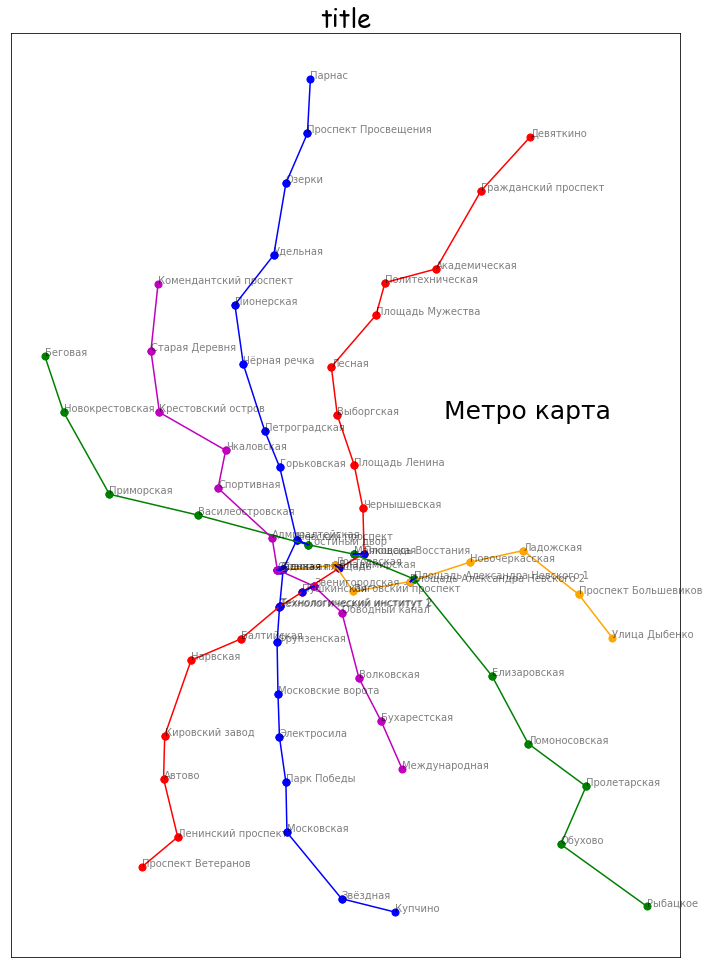

In [27]:
plt.figure(figsize=[12,17])
# plt.scatter(lons, lats, 100, 'r')

for connection in connections_ind:
    st1, st2 = connection
    st1_n, st2_n = stations[st1], stations[st2]
    color = 'b'
    for ind, line in enumerate(lines):
        if st1_n.lower() in line and st2_n.lower() in line:
            color = lines_d[ind]
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color=color)
    plt.scatter([lons[st1], lons[st2]], [lats[st1], lats[st2]], 50, color=color)
    
for inter in inters:
    st1, st2 = inter
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color='b')
    
for ind, station in enumerate(stations):
    plt.text(lons[ind], lats[ind], station, fontsize=10, alpha=0.5)
    
csfont = {'fontname':'Comic Sans MS', 'fontsize' : 25}
hfont = {'fontname':'Helvetica', 'fontsize' : 25}

plt.title('title',**csfont)
plt.text(30.40, 59.97, '–ú–µ—Ç—Ä–æ –∫–∞—Ä—Ç–∞', **hfont)
plt.xticks([])
plt.yticks([])
plt.show()

## –ê–Ω–∞–ª–∏–∑, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–ü–æ–≤—Ç–æ—Ä—é –≤–æ–ø—Ä–æ—Å—ã:

- –ö–∞–∫ —á–∞—Å—Ç–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É –∫–∞–∫–∏–µ —Å—Ç–∞–Ω—Ü–∏–∏? (quess: —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ –∏ —Å–∞–º—ã–µ –∫–æ–Ω–µ—á–Ω—ã–µ —á–∞—â–µ –≤—Å–µ–≥–æ)
- –Ω–∞ —Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –∫–∞–∫–∞—è? (quess: –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –ø–æ –Ω–∞—Ä–∞—Å—Ç–∞—é—â–µ–π, –¥–æ 1.5 —á–∞—Å–æ–≤)
- —Å–∫–æ–ª—å–∫–æ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º –∏ –ø–æ—Å—Ç–æ–º –≤ —Ç–µ–ª–µ–≥—Ä–∞–º–µ (quess: 5-10)
- –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫—Ä—ã—Ç—ã—Ö –∑–∞ –¥–µ–Ω—å? (quess: –≤—Å–µ –∏–ª–∏ 12)
- —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–æ "–ø–∞–¥–µ–Ω–∏–µ", "—Ñ—É—Ç–±–æ–ª", "—Ö–æ–∫–∫–µ–π", "–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç—å"

### –ü—Ä–æ—Å–º–æ—Ç—Ä—ã

–ü–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∫–∞–Ω–∞–ª–∞:

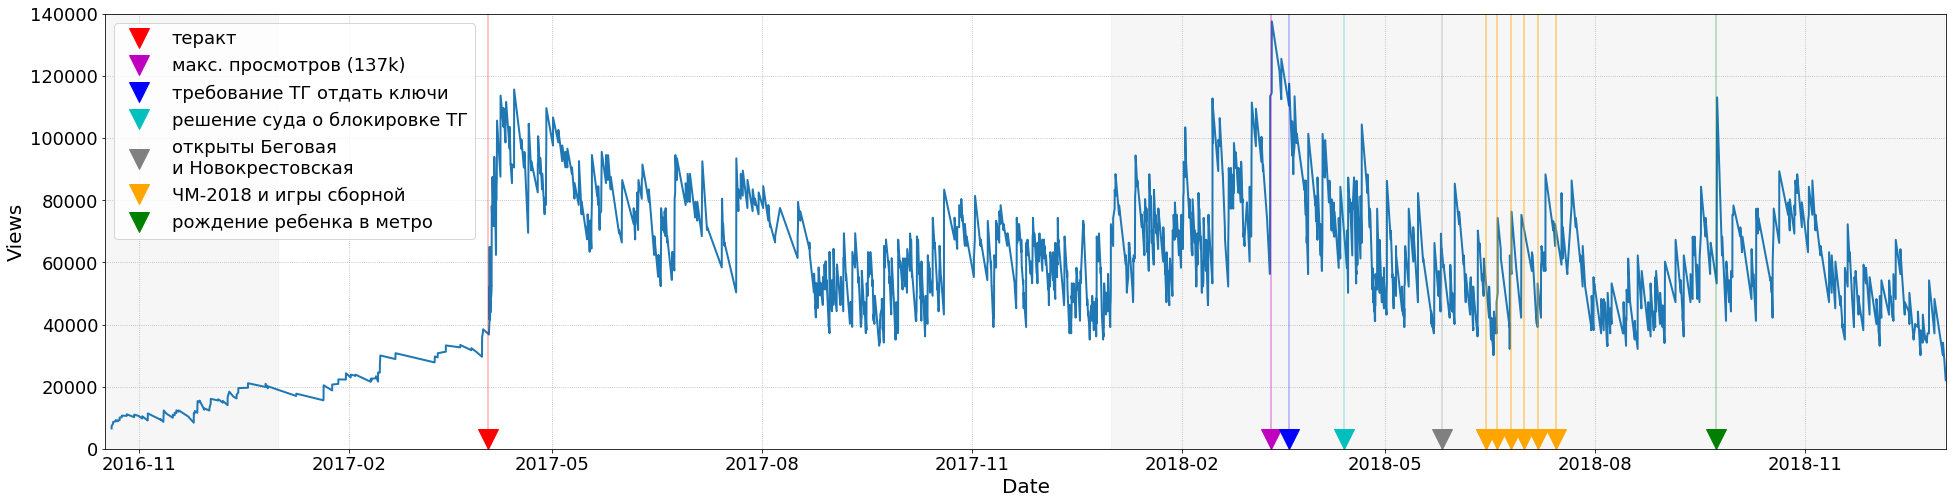

In [162]:
fig = plt.figure(figsize=[33, 8])
plt.plot([pytz.utc.localize(l.date).astimezone(user_timezone) for l in orig_messages], [l.views for l in orig_messages],'-', lw=2)

plt.axvline(x = datetime.date(2017, 4, 3), color = 'r', alpha=0.3) # —Ç–µ—Ä–∞–∫—Ç
plt.plot(datetime.date(2017, 4, 3), 3000, 'v', label='—Ç–µ—Ä–∞–∫—Ç', color='r', ms=20)

# plt.axvline(x = datetime.date(2018, 1, 1), color = 'b', alpha=0.6) # —Å—Ç–∞—Ä—Ç –Ω–æ–≤–æ–≥–æ –≥–æ–¥–∞
plt.fill_between([datetime.date(2018, 1, 1), datetime.date(2019, 1, 1)], [0, 0], [140000, 140000], color='grey', alpha=0.07)
plt.fill_between([datetime.date(2016, 10, 17), datetime.date(2017, 1, 1)], [0, 0], [140000, 140000], color='grey', alpha=0.07)

plt.axvline(x = datetime.date(2018, 3, 12), color = 'm', alpha=0.4)
plt.plot(datetime.date(2018, 3, 12), 3000, 'v', label='–º–∞–∫—Å. –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (137k)', color='m', ms=20)

plt.axvline(x = datetime.date(2018, 3, 20), color = 'b', alpha=0.3)
plt.plot(datetime.date(2018, 3, 20), 3000, 'v', label='—Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –¢–ì –æ—Ç–¥–∞—Ç—å –∫–ª—é—á–∏', color='b', ms=20)

plt.axvline(x = datetime.date(2018, 4, 13), color = 'c', alpha=0.3)
plt.plot(datetime.date(2018, 4, 13), 3000, 'v', label='—Ä–µ—à–µ–Ω–∏–µ —Å—É–¥–∞ –æ –±–ª–æ–∫–∏—Ä–æ–≤–∫–µ –¢–ì', color='c', ms=20)

plt.axvline(x = datetime.date(2018, 5, 26), color = 'grey', alpha=0.3)
plt.plot(datetime.date(2018, 5, 26), 3000, 'v', label='–æ—Ç–∫—Ä—ã—Ç—ã –ë–µ–≥–æ–≤–∞—è \n–∏ –ù–æ–≤–æ–∫—Ä–µ—Å—Ç–æ–≤—Å–∫–∞—è', color='grey', ms=20)


plt.axvline(x = datetime.date(2018, 6, 14), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
# plt.text(datetime.date(2018, 6, 14), 0, '–ß–ú-2018', rotation='30', fontsize=20)
plt.plot(datetime.date(2018, 6, 14), 3000, 'v', label='–ß–ú-2018 –∏ –∏–≥—Ä—ã —Å–±–æ—Ä–Ω–æ–π', color='orange', ms=20)
plt.axvline(x = datetime.date(2018, 6, 19), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
plt.axvline(x = datetime.date(2018, 7, 1), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
plt.axvline(x = datetime.date(2018, 6, 25), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
plt.axvline(x = datetime.date(2018, 7, 7), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú

plt.axvline(x = datetime.date(2018, 7, 15), color = 'orange', alpha=0.4, lw=2) # —Å—Ç–∞—Ä—Ç –ß–ú
# plt.text(datetime.date(2018, 6, 14), 0, '–ß–ú-2018', rotation='30', fontsize=20)
plt.plot([datetime.date(2018, 7, 15), datetime.date(2018, 6, 14), datetime.date(2018, 6, 19), datetime.date(2018, 7, 1), datetime.date(2018, 6, 25), datetime.date(2018, 7, 7)], [3000]*6 , 'v', color='orange', ms=20)


plt.axvline(x = datetime.date(2018, 9, 23), color = 'g', alpha=0.3)
plt.plot(datetime.date(2018, 9, 23), 3000, 'v', label='—Ä–æ–∂–¥–µ–Ω–∏–µ —Ä–µ–±–µ–Ω–∫–∞ –≤ –º–µ—Ç—Ä–æ', color='g', ms=20)


plt.ylabel('Views', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.grid()
plt.xlim(datetime.date(2016, 10, 17), datetime.date(2019, 1, 2))
plt.ylim(0, 140000)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation='0', fontsize=18)
plt.setp(ax.get_yticklabels(), rotation='0', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
plt.savefig('./imgs/view_stats2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=400)
plt.show()

–ü–∏–∫ –≤ —Å–µ–Ω—Ç—è–±—Ä–µ:

In [62]:
user_timezone = pytz.timezone('Europe/Moscow')
for i in range(0, 320):
    msg = orig_messages[-i]
    if msg.views > 100000:
        print(pytz.utc.localize(msg.date).astimezone(user_timezone).strftime("%Y-%m-%d %H:%M:%S") + ' ' + msg.message + ' ' + str(msg.views))

2018-09-23 14:24:31 –£ –Ω–∞—Å —Ö–æ—Ä–æ—à–∞—è –Ω–æ–≤–æ—Å—Ç—å! –ù–∞ —Å—Ç. –¢–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –∏–Ω—Å—Ç–∏—Ç—É—Ç –≤ 13.45 —Ä–æ–¥–∏–ª—Å—è –º–∞–ª—å—á–∏–∫ üë∂ –ø–æ–º–æ—â—å –≤ –±—ã—Å—Ç—Ä—ã—Ö —Ä–æ–¥–∞—Ö –æ–∫–∞–∑–∞–ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å—Ç–∞–Ω—Ü–∏–∏. –°–µ–π—á–∞—Å –º–∞–ª—ã—à –∏ –º–∞–º–∞ –≤ –±–æ–ª—å–Ω–∏—Ü–µ –∏ —Å –Ω–∏–º–∏ –≤—Å–µ —Ö–æ—Ä–æ—à–æ! –≠—Ç–æ –ø–µ—Ä–≤—ã–π –º–µ—Ç—Ä–æ–º–∞–ª—ã—à, –∫–æ—Ç–æ—Ä—ã–π –ø–æ—è–≤–∏–ª—Å—è –Ω–∞ —Å–≤–µ—Ç –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥—Å–∫–æ–π  –ø–æ–¥–∑–µ–º–∫–µ –∑–∞ –±–æ–ª–µ–µ –ø–æ–ª—É–≤–µ–∫–æ–≤—É—é –∏—Å—Ç–æ—Ä–∏—é! 113138


–ú–∞–∫—Å–∏–º—É–º –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ (137607) —É —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ —Ä—è–¥–æ–≤–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è:

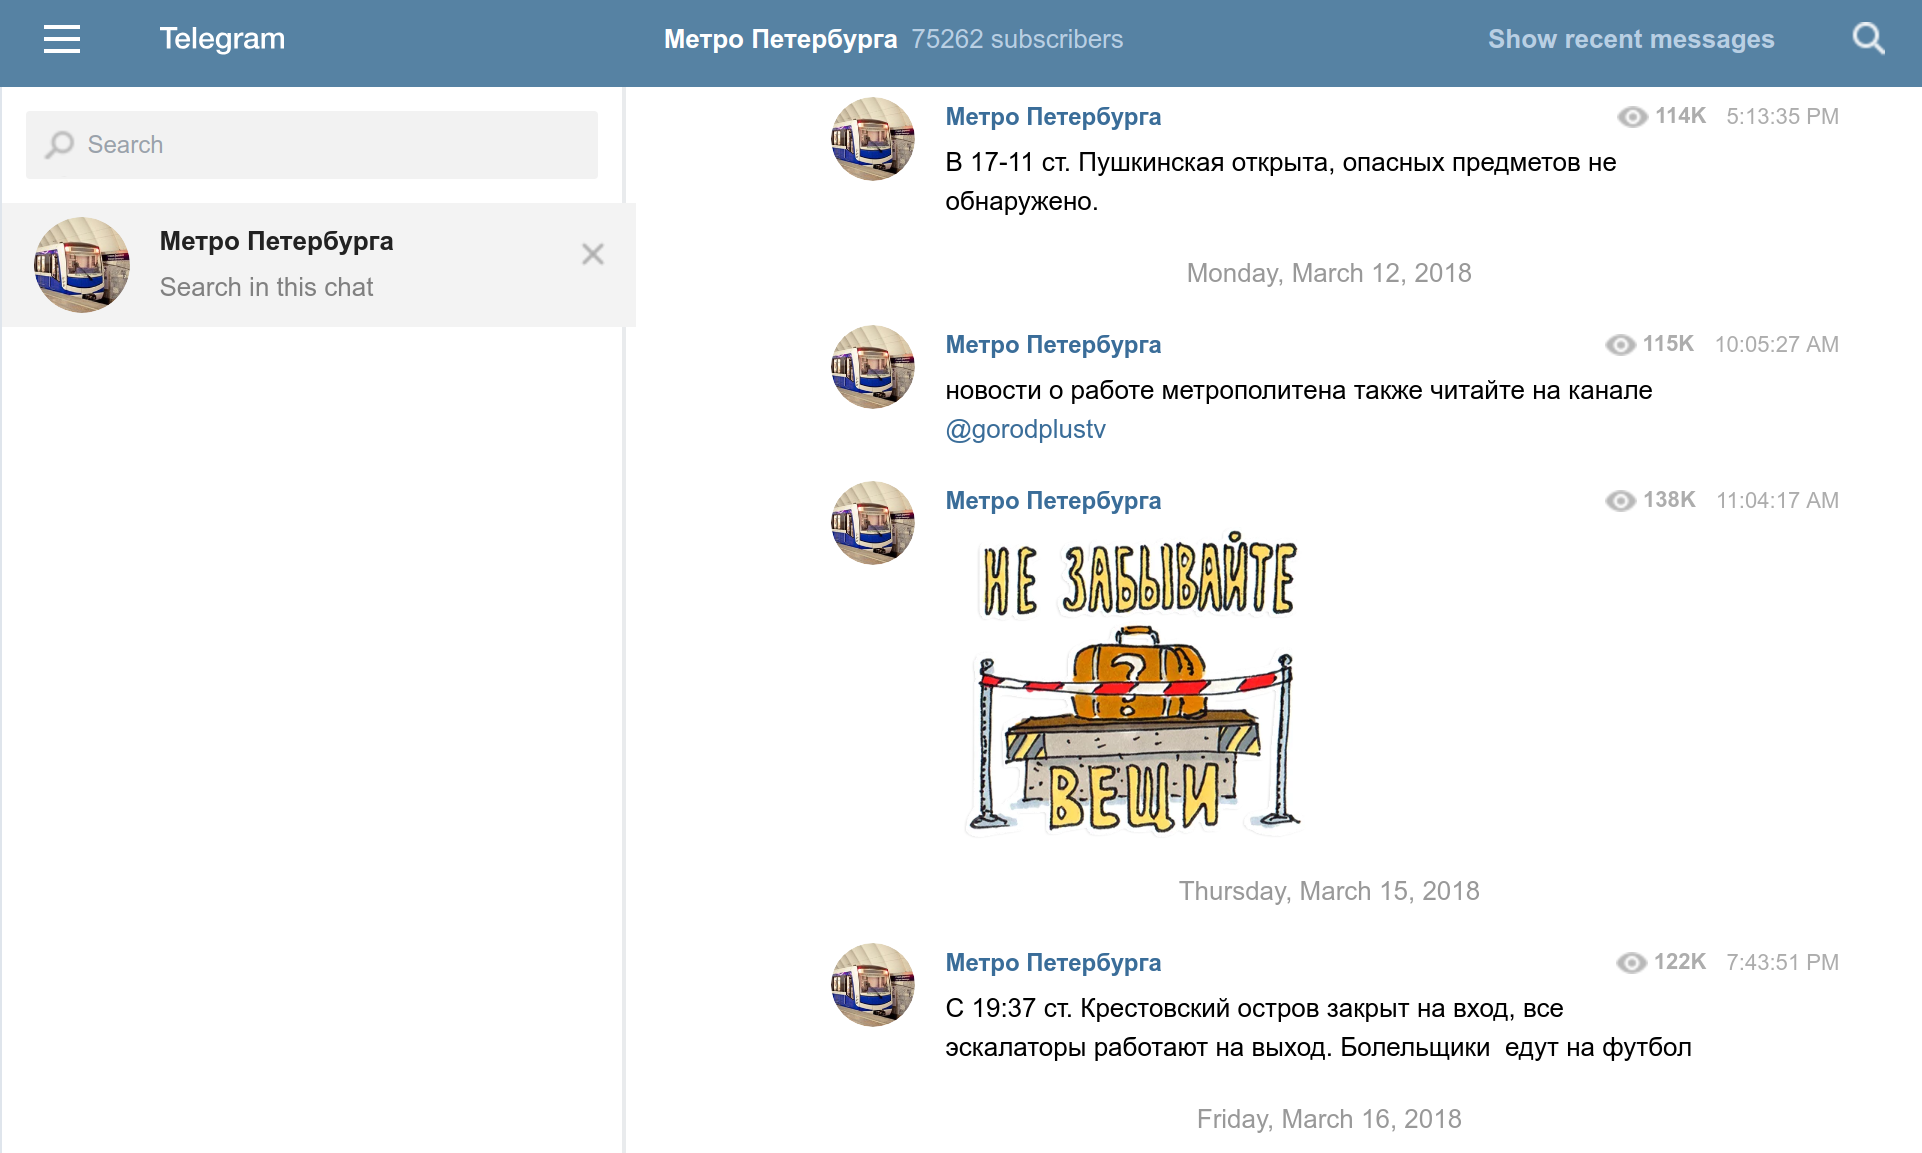

In [81]:
Image('./imgs/max_views.png', width=1000)

–ò–Ω—Ç–µ—Ä–µ—Å–Ω–æ —á—Ç–æ –ø–∏–∫–∏ –Ω–∞ –ß–ú - –ø—Ä–æ—Å—Ç–æ —Ä—è–¥–æ–≤—ã–µ –∑–∞–∫—Ä—ã—Ç–∏—è –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –∏–Ω—Ñ—ã.

### –ó–∞–¥–µ—Ä–∂–∫–∞ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º –∏ —Å–æ–æ–±—â–µ–Ω–∏–µ–º

—Å–∫–æ–ª—å–∫–æ –º–µ–∂–¥—É –∑–∞–∫—Ä—ã—Ç–∏–µ–º/—Å–æ–±—ã—Ç–∏–µ–º –∏ –ø–æ—Å—Ç–æ–º –≤ —Ç–µ–ª–µ–≥—Ä–∞–º–µ (quess: 5-10)

In [28]:
post_delay = []
for ind, entity in enumerate(extracted_data):
    text, i, actt, sts, tts, stat = entity
    actual_date = datetime.datetime.strptime(actt, "%Y-%m-%d %H:%M:%S")
#     hour, minute = actual_date.hour, actual_date.minute
    hour, minute = None, None
    if tts:
        try:
            if '.' in tts[0]:
                hour, minute = tts[0].split('.')
            elif '-' in tts[0]:
                hour, minute = tts[0].split('-')
            elif ':' in tts[0]:
                hour, minute = tts[0].split(':')
        except Exception:
            print(tts)
    if hour is not None and minute is not None:
        text_date = actual_date.replace(hour=int(hour), minute=int(minute), second=actual_date.second)
        post_delay.append((actual_date - text_date).total_seconds()/60.)
        
len(post_delay)

861

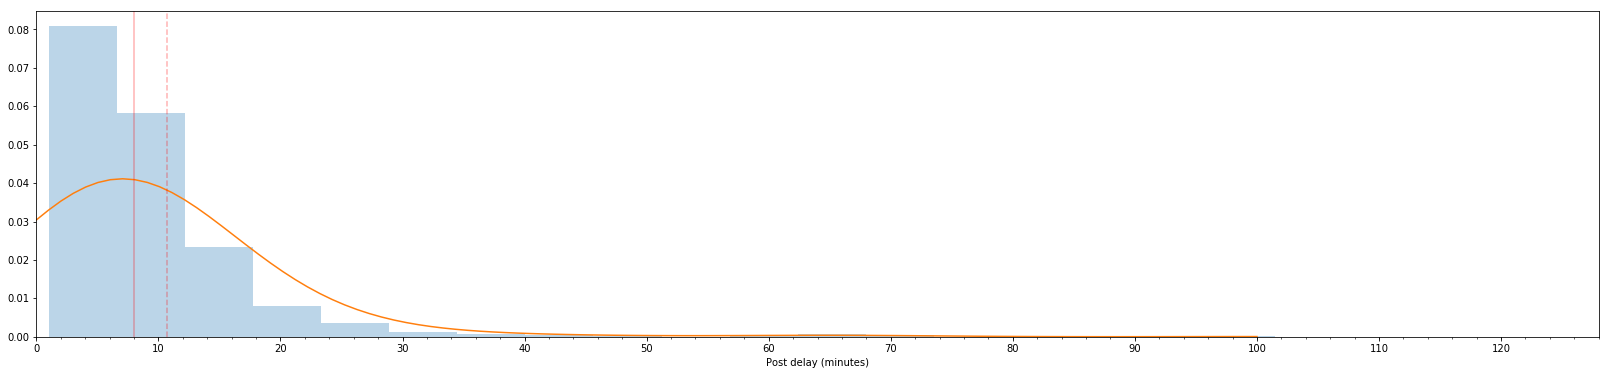

In [32]:
from scipy import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

minorLocator = MultipleLocator(2)
majorLocator = MultipleLocator(10)

post_delay = np.array(post_delay)
post_delay = post_delay[post_delay > 0]

kde = stats.gaussian_kde(post_delay)
xx = np.linspace(0, 100, 100)

fig, ax = plt.subplots(figsize=(28,6))
ax.hist(post_delay, normed=True, bins=100, alpha=0.3)
ax.plot(xx, kde(xx))
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel('Post delay (minutes)')
plt.axvline(x=np.median(post_delay), ls='-', color='r', alpha=0.3)
plt.axvline(x=np.mean(post_delay), ls='--', color='r', alpha=0.3)
plt.xlim(0, 128)
plt.savefig('./imgs/delay2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=400)
plt.show()

–ù–µ–ø–ª–æ—Ö–æ–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —Å—Ç–∞–ª–æ –¥–∞–∂–µ –Ω–µ–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ —á–µ–º –≤ 2017.

### –ö–∞–∫–∏–µ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å —á–∞—â–µ –≤—Å–µ–≥–æ

–ö–∞–∫ —á–∞—Å—Ç–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É –∫–∞–∫–∏–µ —Å—Ç–∞–Ω—Ü–∏–∏? (quess: —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ –∏ —Å–∞–º—ã–µ –∫–æ–Ω–µ—á–Ω—ã–µ —á–∞—â–µ –≤—Å–µ–≥–æ)

In [33]:
station_mentions = {}
for ind, entity in enumerate(extracted_data):
    text, i, actt, sts, tts, stat = entity
    for st in sts:
        if st in station_mentions.keys():
            station_mentions[st] += 1
        else:
            station_mentions[st] = 1

In [34]:
for k, v in sorted(station_mentions.items(), key=lambda l: (l[1],l[0]), reverse=True): print(k, v)

–ü–ª–æ—â–∞–¥—å –í–æ—Å—Å—Ç–∞–Ω–∏—è 80
–ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä 70
–ù–µ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç 68
–ú–∞—è–∫–æ–≤—Å–∫–∞—è 55
–£–¥–µ–ª—å–Ω–∞—è 37
–ó–≤–µ–Ω–∏–≥–æ—Ä–æ–¥—Å–∫–∞—è 35
–ü—É—à–∫–∏–Ω—Å–∫–∞—è 32
–î–æ—Å—Ç–æ–µ–≤—Å–∫–∞—è 32
–ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç 31
–í–ª–∞–¥–∏–º–∏—Ä—Å–∫–∞—è 30
–ì–æ—Ä—å–∫–æ–≤—Å–∫–∞—è 27
–ß–µ—Ä–Ω—ã—à–µ–≤—Å–∫–∞—è 26
–û–∑–µ—Ä–∫–∏ 26
–°–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥—å 25
–ü–∏–æ–Ω–µ—Ä—Å–∫–∞—è 25
–ü–µ—Ç—Ä–æ–≥—Ä–∞–¥—Å–∫–∞—è 25
–ö–æ–º–µ–Ω–¥–∞–Ω—Ç—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç 24
–°—Ç–∞—Ä–∞—è –î–µ—Ä–µ–≤–Ω—è 23
–ü—Ä–æ—Å–ø–µ–∫—Ç –ü—Ä–æ—Å–≤–µ—â–µ–Ω–∏—è 23
–ü—Ä–æ—Å–ø–µ–∫—Ç –í–µ—Ç–µ—Ä–∞–Ω–æ–≤ 23
–¢–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –∏–Ω—Å—Ç–∏—Ç—É—Ç 1 22
–ü–ª–æ—â–∞–¥—å –õ–µ–Ω–∏–Ω–∞ 22
–ü–ª–æ—â–∞–¥—å –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –ù–µ–≤—Å–∫–æ–≥–æ 2 22
–ü–ª–æ—â–∞–¥—å –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –ù–µ–≤—Å–∫–æ–≥–æ 1 22
–†—ã–±–∞—Ü–∫–æ–µ 21
–ü—Ä–∏–º–æ—Ä—Å–∫–∞—è 21
–ù–æ–≤–æ—á–µ—Ä–∫–∞—Å—Å–∫–∞—è 21
–¢–µ—Ö–Ω–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π –∏–Ω—Å—Ç–∏—Ç—É—Ç 2 20
–°–∞–¥–æ–≤–∞—è 20
–õ–∏–≥–æ–≤—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç 20
–

–¢—É—Ç –Ω–∞–¥–æ –¥–µ–ª–∏—Ç—å –Ω–∞ –¥–≤–∞, –Ω–æ –¥–ª—è –∫–∞—Ä—Ç—ã —ç—Ç–æ –Ω–µ –≤–∞–∂–Ω–æ.

–ö–∞—Ä—Ç–∞:

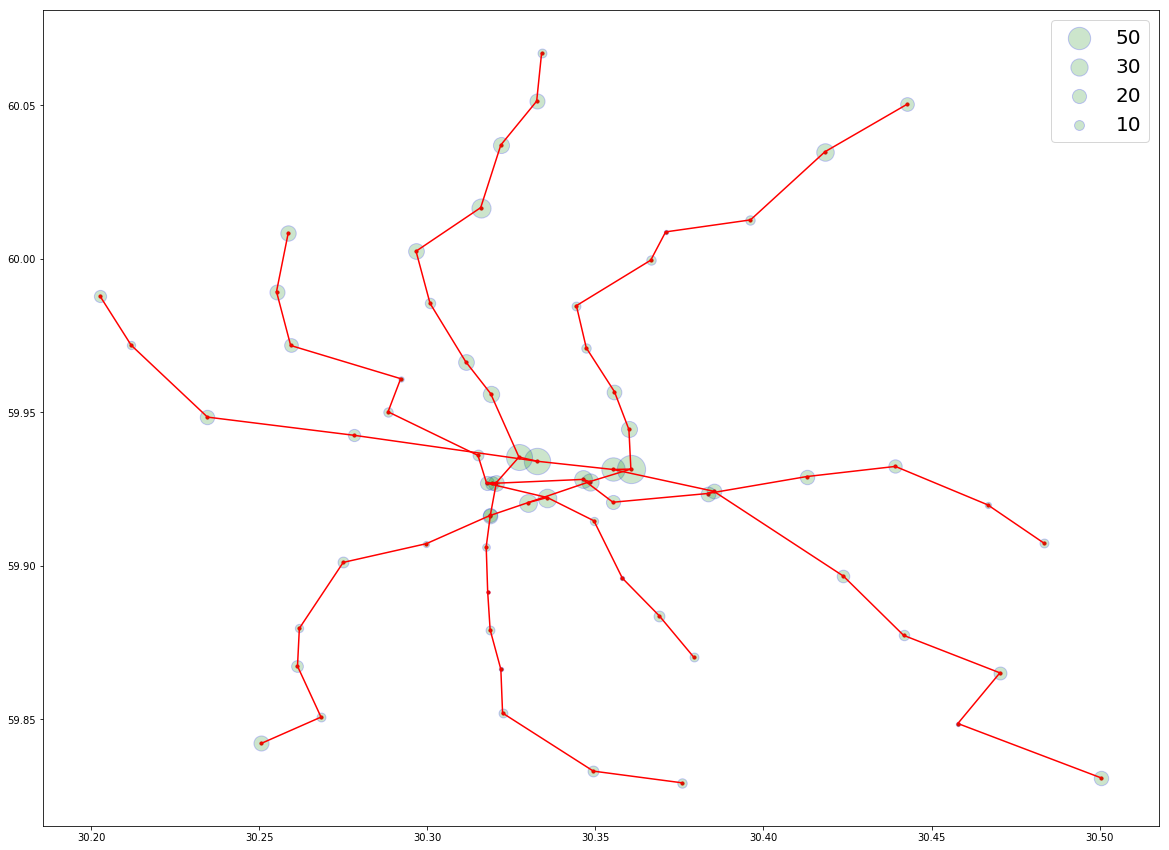

In [48]:
plt.figure(figsize=[20,15])
plt.scatter(lons, lats, 10, 'r')
for connection in connections_ind:
    st1, st2 = connection
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color='r')
    
for ind,station in enumerate(stations):
    if station in station_mentions.keys():
        plt.scatter(lons[ind], lats[ind], 10*station_mentions[station], 'g', edgecolor='b', alpha=0.2)

ax = plt.gca()
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
        
plt.scatter([30.],[58.],[50*10], 'g', edgecolor='b', alpha=0.2, label='50')
plt.scatter([30.],[58.],[30*10], 'g', edgecolor='b', alpha=0.2, label='30')
plt.scatter([30.],[58.],[20*10], 'g', edgecolor='b', alpha=0.2, label='20')
plt.scatter([30.],[58.],[10*10], 'g', edgecolor='b', alpha=0.2, label='10')
plt.legend(fontsize=20)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
        
plt.savefig('./imgs/mentions2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=200)
plt.show()

–ü—Ä–æ –∫—Ä–∞–π–Ω–∏–µ —è –Ω–µ —É–≥–∞–¥–∞–ª, –∞ –ø—Ä–æ —Ü–µ–Ω—Ç—Ä –∏ —Ç–∞–∫ –ø–æ–Ω—è—Ç–Ω–æ.

*–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —ç—Ç–æ —É–ø–æ–º–∏–Ω–∞–Ω–∏—è, –∞ –Ω–µ —Ç–æ—á–Ω–æ–µ —á–∏—Å–ª–æ, –Ω–æ —Å–≤—è–∑—å –¥—É–º–∞—é —Å–∞–º–∞—è –ø—Ä—è–º–∞—è.*

### –ù–∞ —Å–∫–æ–ª—å–∫–æ –∑–∞–∫—Ä—ã–≤–∞–ª–∏—Å—å

–Ω–∞ —Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –∫–∞–∫–∞—è? (quess: –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –ø–æ –Ω–∞—Ä–∞—Å—Ç–∞—é—â–µ–π, –¥–æ 1.5 —á–∞—Å–æ–≤)

In [49]:
def get_text_time(actt, tts):
    actual_date = datetime.datetime.strptime(actt, "%Y-%m-%d %H:%M:%S")
    hour, minute = actual_date.hour, actual_date.minute
    if tts:
        try:
            if '.' in tts[0]:
                hour, minute = tts[0].split('.')
            elif '-' in tts[0]:
                hour, minute = tts[0].split('-')
            elif ':' in tts[0]:
                hour, minute = tts[0].split(':')
        except Exception:
            print(tts)
    if hour is not None and minute is not None:
        text_date = actual_date.replace(hour=int(hour), minute=int(minute), second=actual_date.second)
    return actual_date, text_date

In [50]:
closed_time = []
for station in stations:
    station_messages = []
    station_ids = []
    for ind, entity in enumerate(extracted_data):
        text, i, actt, sts, tts, stat = entity

        if station in sts and stat is not 'UNKNOWN' and i not in station_ids:
            station_messages.append([tts, stat, actt, text, i])
            station_ids.append(i)
    
    if station_messages == []:
        print(station)
        continue
    
    status_sum = ''          
    actual_date = datetime.datetime.strptime(station_messages[-1][2], "%Y-%m-%d %H:%M:%S")
    status = ''
    
    print(station_messages)
    
    for i in range(len(station_messages)):
        tts, stat, actt, text, _ = station_messages[i]
        date = datetime.datetime.strptime(station_messages[i][2], "%Y-%m-%d %H:%M:%S")
        
        print('-'*20)
        print(tts, stat, actt, text, _, date)
        print(actual_date.date(),date.date())
        
        if actual_date.date() == date.date() or actual_date.date() == (date - datetime.timedelta(hours=1)).date():
            msg = station_messages[i]
            if msg[1] == 'CLOSE':
                status_sum = status_sum + 'C'
            elif msg[1] == 'OPEN':
                if status_sum:
                    if status_sum[-1] == 'C':
                        status_sum = status_sum[:-1]
                        print('APPEND')
                        tts1, stat1, actt1, text1, i1 = station_messages[i-1]
                        print(tts1, stat1, actt1, text1, i1)
                        closed_time.append([station, get_text_time(actt1,tts1)[1], get_text_time(actt,tts)[1]])
#                         if (get_text_time(actt,tts)[1]-get_text_time(actt1,tts1)[1]).total_seconds()/60. > 250:
#                             print(actt,tts,actt1,tts1)
                    else:
                        status_sum = status_sum + 'O'
                else:
                    status_sum = status_sum + 'O'
        else:
            print('+')
            actual_date = date
            if status_sum:
                status = status + '|' + status_sum
            status_sum = 'C' if station_messages[i][1] == 'CLOSE' else 'O'

[[['21-58'], 'CLOSE', '2018-01-08 22:05:11', '–í 21-58 —Å—Ç  –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞', 17], [['22-49'], 'OPEN', '2018-01-08 22:52:05', '–í 22-49 —Å—Ç  –ê–≤—Ç–æ–≤–æ –æ—Ç–∫—Ä—ã—Ç–∞.', 18], [['22-53'], 'CLOSE', '2018-01-27 22:56:45', '–í 22-53 —Å—Ç  –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞.', 105], [['22-59'], 'OPEN', '2018-01-27 23:01:08', '–í 22-59 —Å—Ç  –ê–≤—Ç–æ–≤–æ –æ—Ç–∫—Ä—ã—Ç–∞.', 106], [['20-48', '20-51'], 'CLOSE', '2018-02-09 20:57:14', '–í 20-48 —Å—Ç  –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –∏ –≤  20-51 —Å—Ç  –ü—É—à–∫–∏–Ω—Å–∫–∞—è –∑–∞–∫—Ä—ã—Ç–∞.', 174], [['21-35'], 'OPEN', '2018-02-09 21:40:41', '–í 21-35  —Å—Ç  –ê–≤—Ç–æ–≤–æ –æ—Ç–∫—Ä—ã—Ç–∞, –æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.', 176], [['18-25'], 'CLOSE', '2018-04-10 18:27:46', '–í 18-25 —Å—Ç  –ê–≤—Ç–æ–≤–æ –∑–∞–∫—Ä—ã—Ç–∞ –

--------------------
['23-32'] OPEN 2018-01-28 23:34:27 –í 23-32 —Å—Ç  –ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä  –æ—Ç–∫—Ä—ã—Ç–∞, –æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ. 113 2018-01-28 23:34:27
2018-01-28 2018-01-28
APPEND
['22-45'] CLOSE 2018-01-28 22:56:47 –í 22-45 —Å—Ç  –ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä  –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞. 112
--------------------
['07-45'] CLOSE 2018-02-12 07:57:53 –í 07-45 —Å—Ç  –ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä  –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ. 191 2018-02-12 07:57:53
2018-01-28 2018-02-12
+
--------------------
['08-53'] OPEN 2018-02-12 08:58:42 –í 08-53 —Å—Ç  –ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä  –æ—Ç–∫—Ä—ã—Ç–∞. 192 2018-02-12 08:58:42
2018-02-12 2018-02-12
APPEND
['07-45'] CLOSE 2018-02-12 07:57:53 –í 07-45 —Å—Ç  –ì—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –ø—Ä  –∑–∞–∫—Ä—ã—Ç–∞ –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–

['14-57'] CLOSE 2018-10-10 15:08:25 –í 14-57 —Å—Ç  –ö—Ä–µ—Å—Ç–æ–≤—Å–∫–∏–π –æ—Å—Ç—Ä–æ–≤ –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ 867
[[['21-50'], 'CLOSE', '2018-01-16 22:03:08', '–í 21-50 —Å—Ç  –ö—É–ø—á–∏–Ω–æ –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥, –Ω–∞ –≤—ã—Ö–æ–¥ —Ä–∞–±–æ—Ç–∞–µ—Ç.', 50], [['22-06'], 'OPEN', '2018-01-16 22:09:28', '–í 22-06 —Å—Ç  –ö—É–ø—á–∏–Ω–æ –æ—Ç–∫—Ä—ã—Ç–∞, —Ö–æ–∑—è–∏–Ω –ø–∞–∫–µ—Ç–∞ –Ω–∞—à—ë–ª—Å—è.', 51], [['20-20'], 'OPEN', '2018-01-28 20:26:31', '–í 20-20 —Å—Ç  –ö—É–ø—á–∏–Ω–æ –æ—Ç–∫—Ä—ã—Ç–∞.', 111]]
--------------------
['21-50'] CLOSE 2018-01-16 22:03:08 –í 21-50 —Å—Ç  –ö—É–ø—á–∏–Ω–æ –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥, –Ω–∞ –≤—ã—Ö–æ–¥ —Ä–∞–±–æ—Ç–∞–µ—Ç. 50 2018-01-16 22:03:08
2018-01-28 2018-01-16
+
--------------------
['22-06'] OPEN 2018-01-16 22:09:28 –í 22-06 —Å—Ç  –ö—É–ø—á–∏–Ω–æ –æ—Ç–∫—Ä—ã—Ç–∞, —Ö–æ–∑—è–∏–Ω –ø–∞–∫–µ—Ç–∞ –Ω–∞—à—ë–ª—Å—è. 51 2018-01-16 22:09:28
2018-01-16 2018-01-16
APPEND
['21-50'] CLOSE 2018-01-16 22:03:08 –í 21-50 —Å—Ç  –ö—É–ø—á–∏–Ω–æ –∑

2018-06-17 2018-06-29
+
--------------------
['19-47'] OPEN 2018-06-29 19:54:56 –í 19-47 —Å—Ç  –ù–µ–≤—Å–∫–∏–π –ø—Ä –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç  –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –æ—Ç–∫—Ä—ã—Ç—ã. 638 2018-06-29 19:54:56
2018-06-29 2018-06-29
APPEND
['19-21'] CLOSE 2018-06-29 19:29:18 –° 19-21 —Å—Ç  –ù–µ–≤—Å–∫–∏–π –ø—Ä  –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç  –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –∑–∞–∫—Ä—ã—Ç—ã –≤ —Å–≤—è–∑–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ. 636
--------------------
['22-50'] CLOSE 2018-07-19 23:00:17 –í 22-50 —Å—Ç  –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç  –ù–µ–≤—Å–∫–∏–π –ø—Ä –∑–∞–∫—Ä—ã—Ç—ã  –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞. 672 2018-07-19 23:00:17
2018-06-29 2018-07-19
+
--------------------
['23-34'] OPEN 2018-07-19 23:37:02 –í 23-34 —Å—Ç  –ì–æ—Å—Ç–∏–Ω—ã–π –¥–≤–æ—Ä –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç  –ù–µ–≤—Å–∫–∏–π –ø—Ä  –æ—Ç–∫—Ä—ã—Ç—ã, –æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–

['20-33'] OPEN 2018-11-27 20:35:29 –í 20-33 —Å—Ç  –ø–ª  –í–æ—Å—Å—Ç–∞–Ω–∏—è 1,2 –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç  –ú–∞—è–∫–æ–≤—Å–∫–∞—è –æ—Ç–∫—Ä—ã—Ç—ã. 963 2018-11-27 20:35:29
2018-11-27 2018-11-27
APPEND
['19-43'] CLOSE 2018-11-27 19:57:23 –í 19-43 —Å—Ç  –ø–ª  –í–æ—Å—Å—Ç–∞–Ω–∏—è 1 –∏ 2 –∏ –ø–µ—Ä–µ—Ö–æ–¥ –∑–∞–∫—Ä—ã—Ç—ã –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞. 962
--------------------
['07-58'] CLOSE 2018-12-19 08:16:31 –í 07-58 —Å—Ç  –ú–∞—è–∫–æ–≤—Å–∫–∞—è –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç  –ø–ª  –í–æ—Å—Å—Ç–∞–Ω–∏—è –∑–∞–∫—Ä—ã—Ç—ã –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞. 1011 2018-12-19 08:16:31
2018-11-27 2018-12-19
+
--------------------
['08-19'] OPEN 2018-12-19 08:20:25 –í 08-19 —Å—Ç  –ú–∞—è–∫–æ–≤—Å–∫–∞—è –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–∞ —Å—Ç  –ø–ª  –í–æ—Å—Å—Ç–∞–Ω–∏—è –æ—Ç–∫—Ä—ã—Ç—ã. 1012 2018-12-19 08:20:25
2018-12-19 2018-12-19
APPEND
['07-58'] CLOSE 2018-12-19 08:16:31 –í 07-58 —Å—Ç  –ú–∞—è–∫–æ–≤—Å–∫–∞—è –∏ –ø–µ—Ä–µ—Ö–æ–¥ –Ω–

['15-30'] OPEN 2018-02-08 15:34:10 –° 15-30 —Å—Ç  –°–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥—å —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ –æ–±—ã—á–Ω–æ–º —Ä–µ–∂–∏–º–µ 166 2018-02-08 15:34:10
2018-02-08 2018-02-08
APPEND
['13-49'] CLOSE 2018-02-08 13:56:45 –í 13-49 —Å—Ç  –°–µ–Ω–Ω–∞—è –ø–ª–æ—â–∞–¥—å –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ –≤—Ö–æ–¥, –Ω–∞ –≤—ã—Ö–æ–¥ —Ä–∞–±–æ—Ç–∞–µ—Ç 165
--------------------
['14-12'] CLOSE 2018-02-17 14:22:15 –í 14-12 —Å—Ç –°–µ–Ω–Ω–∞—è  –∏ –ø–µ—Ä–µ—Ö–æ–¥—ã –∑–∞–∫—Ä—ã—Ç—ã –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ. 214 2018-02-17 14:22:15
2018-02-08 2018-02-17
+
--------------------
['14-50'] OPEN 2018-02-17 14:54:05 –í 14-50 —Å—Ç  –°–µ–Ω–Ω–∞—è –æ—Ç–∫—Ä—ã—Ç–∞, –æ–ø–∞—Å–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ. 215 2018-02-17 14:54:05
2018-02-17 2018-02-17
APPEND
['14-12'] CLOSE 2018-02-17 14:22:15 –í 14-12 —Å—Ç –°–µ–Ω–Ω–∞—è  –∏ –ø–µ—Ä–µ—Ö–æ–¥—ã –∑–∞–∫—Ä—ã—Ç—ã –≤ —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –Ω–∞ –ø–ª

['14-11'] CLOSE 2018-02-07 14:18:00 –í 14-11 —Å—Ç  –£–¥–µ–ª—å–Ω–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ 156
--------------------
['11-03'] CLOSE 2018-02-12 11:16:28 –í 11-03 —Å—Ç  –£–¥–µ–ª—å–Ω–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞. 193 2018-02-12 11:16:28
2018-02-07 2018-02-12
+
--------------------
['12-10'] OPEN 2018-02-12 12:11:18 –í 12-10 —Å—Ç  –£–¥–µ–ª—å–Ω–∞—è –æ—Ç–∫—Ä—ã—Ç–∞. 194 2018-02-12 12:11:18
2018-02-12 2018-02-12
APPEND
['11-03'] CLOSE 2018-02-12 11:16:28 –í 11-03 —Å—Ç  –£–¥–µ–ª—å–Ω–∞—è –∑–∞–∫—Ä—ã—Ç–∞ –∏–∑-–∑–∞ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏—è –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞. 193
--------------------
['17-37'] CLOSE 2018-02-12 17:46:36 –í 17-37 —Å—Ç  –£–¥–µ–ª—å–Ω–∞—è –∑–∞–∫—Ä—ã—Ç–∞ —Å —Å–≤—è–∑–∏ —Å –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º –±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ –ø—Ä–µ–¥–º–µ—Ç–∞ –≤ –≤–µ—Å—Ç–∏–±—é–ª–µ (—Ä—é–∫–∑–∞–∫). 203 2018-02-12 17:46:36
2018-02-12 2018-02-12
--------------------
['18-28'] OPEN 2018-02-12 18:30:21 –

In [51]:
closed_time

[['–ê–≤—Ç–æ–≤–æ',
  datetime.datetime(2018, 1, 8, 21, 58, 11),
  datetime.datetime(2018, 1, 8, 22, 49, 5)],
 ['–ê–≤—Ç–æ–≤–æ',
  datetime.datetime(2018, 1, 27, 22, 53, 45),
  datetime.datetime(2018, 1, 27, 22, 59, 8)],
 ['–ê–≤—Ç–æ–≤–æ',
  datetime.datetime(2018, 2, 9, 20, 48, 14),
  datetime.datetime(2018, 2, 9, 21, 35, 41)],
 ['–ê–≤—Ç–æ–≤–æ',
  datetime.datetime(2018, 4, 10, 18, 25, 46),
  datetime.datetime(2018, 4, 10, 19, 3, 18)],
 ['–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è',
  datetime.datetime(2018, 4, 2, 20, 10, 23),
  datetime.datetime(2018, 4, 2, 21, 6, 58)],
 ['–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è',
  datetime.datetime(2018, 6, 12, 12, 7, 34),
  datetime.datetime(2018, 6, 12, 12, 40, 22)],
 ['–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è',
  datetime.datetime(2018, 8, 30, 16, 48, 8),
  datetime.datetime(2018, 8, 30, 17, 30, 57)],
 ['–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è',
  datetime.datetime(2018, 9, 27, 12, 10, 52),
  datetime.datetime(2018, 9, 27, 12, 34, 36)],
 ['–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∞—è',
  datetime.datetime(2018, 

In [52]:
len(closed_time)

426

In [53]:
closed_time_s = np.array([(l[2]-l[1]).total_seconds()/60. for l in closed_time])

In [54]:
closed_time_s = sorted(closed_time_s)

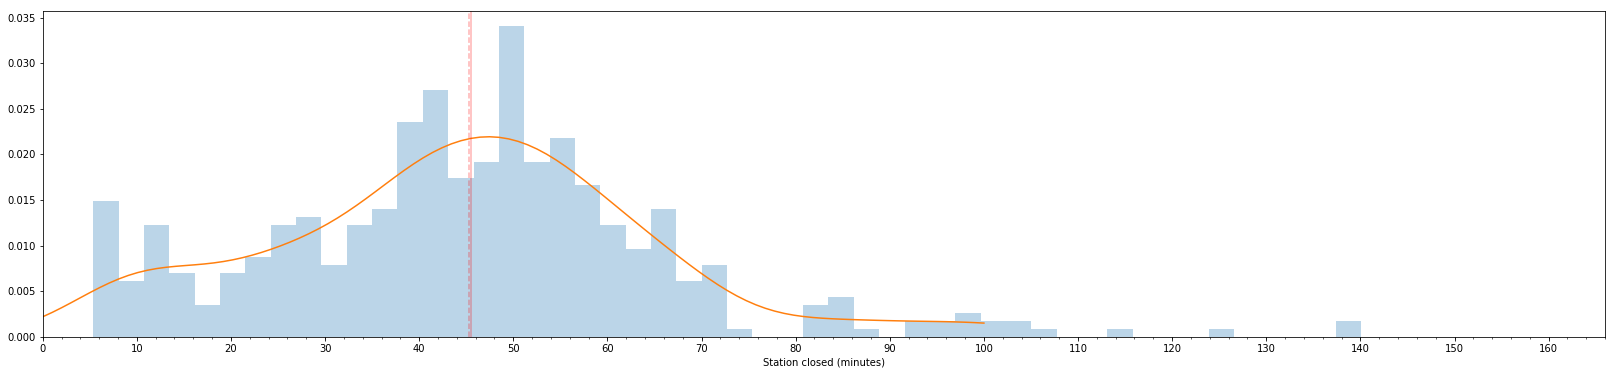

In [55]:
from scipy import stats
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

minorLocator = MultipleLocator(2)
majorLocator = MultipleLocator(10)

kde = stats.gaussian_kde(closed_time_s[:-1])
xx = np.linspace(0, 100, 100)

fig, ax = plt.subplots(figsize=(28,6))
ax.hist(closed_time_s[:-1], normed=True, bins=50, alpha=0.3)
ax.plot(xx, kde(xx))
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel('Station closed (minutes)')
plt.axvline(x=np.median(closed_time_s[:-1]), ls='-', color='r', alpha=0.3)
plt.axvline(x=np.mean(closed_time_s[:-1]), ls='--', color='r', alpha=0.3)
plt.xlim(0,166)
plt.savefig('./imgs/closedtime2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=200)
plt.show()

–í —Å—Ä–µ–¥–Ω–µ–º —Å—Ç–∞–ª–∏ –Ω–∞ –±–æ–ª—å—à–µ–µ –≤—Ä–µ–º—è –∑–∞–∫—Ä—ã–≤–∞—Ç—å, –±–∏–º–æ–¥–∞–ª—å–Ω–æ—Å—Ç—å –ø–æ—á—Ç–∏ –∏—Å—á–µ–∑–ª–∞.

–ü–æ–ø—Ä–æ–±—É–µ–º –Ω–æ—Ä–º–∞–ª—å–Ω—É—é –∫–∞—Ä—Ç—É –Ω–∞—Ä–∏—Å–æ–≤–∞—Ç—å:

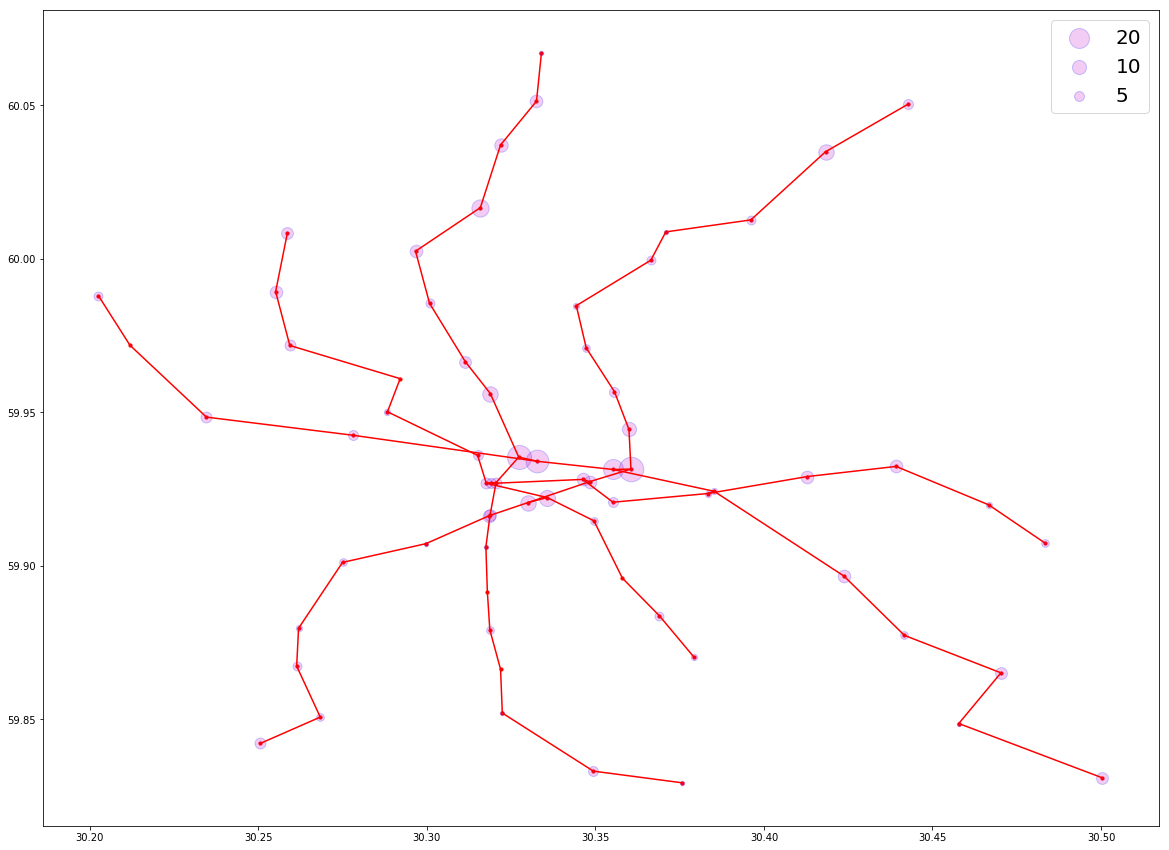

In [65]:
station_closes = {}

for station in stations:
    station_closes[station] = 0

for ind, entity in enumerate(closed_time):
    sts, _1,_2 = entity
    station_closes[sts] += 1

plt.figure(figsize=[20,15])
plt.scatter(lons, lats, 10, 'r')
for connection in connections_ind:
    st1, st2 = connection
    plt.plot([lons[st1], lons[st2]], [lats[st1], lats[st2]], '-', color='r')

multipl = 20
    
for ind,station in enumerate(stations):
    if station in station_mentions.keys():
        plt.scatter(lons[ind], lats[ind], multipl*station_closes[station], 'm', edgecolor='b', alpha=0.2)

ax = plt.gca()
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
        
# plt.scatter([30.],[58.],[50*multipl], 'g', edgecolor='b', alpha=0.2, label='50')
# plt.scatter([30.],[58.],[30*multipl], 'g', edgecolor='b', alpha=0.2, label='30')
plt.scatter([30.],[58.],[20*multipl], 'm', edgecolor='b', alpha=0.2, label='20')
plt.scatter([30.],[58.],[10*multipl], 'm', edgecolor='b', alpha=0.2, label='10')
plt.scatter([30.],[58.],[5*multipl], 'm', edgecolor='b', alpha=0.2, label='5')
plt.legend(fontsize=20)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
        
plt.savefig('./imgs/frequency2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=200)
plt.show()

–í —Ü–µ–ª–æ–º –ø–æ–≤—Ç–æ—Ä—è–µ—Ç –∫–∞—Ä—Ç—É —É–ø–æ–º–∏–Ω–∞–Ω–∏–π, –Ω–æ –ø—Ä–æ–≤–µ—Ä–∏–º:

In [67]:
corr_data = []
for station in stations:
    cl = station_closes[station]
    mt = station_mentions[station]
    corr_data.append((cl,mt))

cl,mt = zip(*corr_data)
print(np.corrcoef(cl,mt)[0,1])

0.9646760734947103


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 0.96, —Ç.–µ. –æ—á–µ–Ω—å –¥–∞–∂–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç (–æ–Ω–æ –∏ –ø–æ–Ω—è—Ç–Ω–æ, –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø–∏—à—É—Ç –ø—Ä–æ –∑–∞–∫—Ä—ã—Ç–∏–µ –∏ –æ—Ç–∫—Ä—ã—Ç–∏–µ). –ó–Ω–∞—á–∏—Ç –≤ –ø—Ä–æ—à–ª–æ–º –≥–æ–¥—É –∫–∞—Ä—Ç–∞ –±—ã–ª–∞ –Ω–µ —Ç–∞–∫–∞—è —É–∂ –∏ –±–µ—Å–ø–æ–ª–µ–∑–Ω–∞—è.

### –ú–∞–∫—Å–∏–º—É–º –∑–∞–∫—Ä—ã—Ç–æ –∑–∞ –¥–µ–Ω—å —Ä–∞–∑

–°–∫–æ–ª—å–∫–æ –º–∞–∫—Å–∏–º—É–º –±—ã–ª–æ –∑–∞–∫—Ä—ã—Ç–æ (—Ä–∞–∑, —Ç.–µ. –æ–¥–Ω–∞ —Å—Ç–∞–Ω—Ü–∏—è –º–æ–∂–µ—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –±–æ–ª—å—à–µ –æ–¥–Ω–æ–≥–æ —Ä–∞–∑–∞) –≤ –¥–µ–Ω—å?

In [68]:
closed_per_day = {}
for st, ct, ot in closed_time:
    date = ct.date()
    if date in closed_per_day.keys():
        closed_per_day[date] += 1
    else:
        closed_per_day[date] = 1

In [69]:
closed_per_day = sorted(closed_per_day.items())

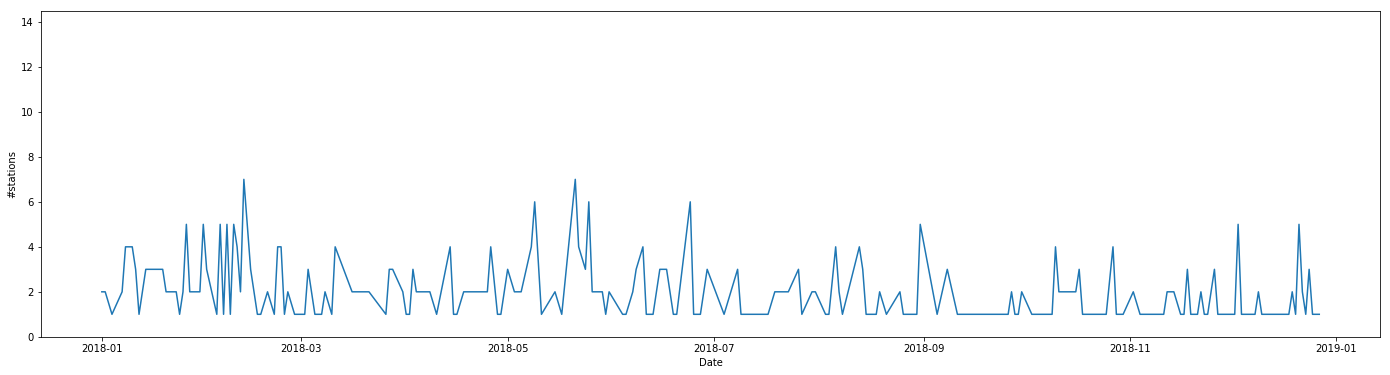

In [76]:
fig = plt.figure(figsize=[24, 6])
plt.plot(list(zip(*closed_per_day))[0], list(zip(*closed_per_day))[1], '-')
# plt.axvline(x = datetime.date(2017, 4, 3), color = 'r', alpha=0.3)
plt.ylabel('#stations')
plt.xlabel('Date')
plt.ylim(0, 14.5)
plt.savefig('./imgs/closedperday2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=200)
plt.show()

–ú–µ–Ω—å—à–µ, —á–µ–º –≤ 2018. –í—Å–µ–≥–æ –¥–Ω–µ–π –∫–æ–≥–¥–∞ —á—Ç–æ-–Ω–∏–±—É–¥—å –Ω–µ –∑–∞–∫—Ä—ã–≤–∞–ª–æ—Å—å:

In [81]:
365-len(list(zip(*closed_per_day))[0])

154

–ê –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É:

In [82]:
np.unique(list(zip(*closed_per_day))[1], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]), array([100,  55,  28,  15,   8,   3,   2]))

### –í—Ä–µ–º—è –∑–∞–∫—Ä—ã—Ç–∏—è

–í –∫–∞–∫–∏–µ —á–∞—Å—ã —á–∞—â–µ –≤—Å–µ–≥–æ –∑–∞–∫—Ä—ã–≤–∞—é—Ç—Å—è:

In [83]:
sample_date = datetime.datetime.now()
sample_dates = []
for st, ct, ot in closed_time:
    s_date = sample_date.replace(hour=ct.hour, minute=ct.minute, second=ct.second)
    sample_dates.append(s_date)

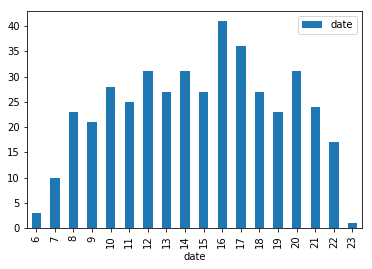

In [84]:
df = pd.DataFrame(data=sample_dates, columns=['date'])
df.groupby(df["date"].dt.hour).count().plot(kind="bar")
plt.savefig('./imgs/closehour2018.png', bbox_inches = 'tight', pad_inches = 0, dpi=200)
plt.show()

–ù–∏—á–µ–≥–æ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å.

### –î—Ä—É–≥–∏–µ –ø—Ä–∏—á–∏–Ω—ã

—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–æ "–ø–∞–¥–µ–Ω–∏–µ", "—Ñ—É—Ç–±–æ–ª", "—Ö–æ–∫–∫–µ–π", "–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç—å"

In [85]:
fulltext = ' '.join(corpora)

In [86]:
for word in ["–ø–∞–¥–µ–Ω", "—Ñ—É—Ç–±–æ–ª", "—Ö–æ–∫–∫–µ–π", "–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω"]:
    print(word + ' : ' + str(fulltext.count(word)))

–ø–∞–¥–µ–Ω : 2
—Ñ—É—Ç–±–æ–ª : 5
—Ö–æ–∫–∫–µ–π : 1
–Ω–µ–∏—Å–ø—Ä–∞–≤–Ω : 8


In [87]:
from collections import Counter
words = re.findall('\w+', fulltext.lower())
Counter(words).most_common(20)

[('—Å—Ç', 1260),
 ('–≤', 1095),
 ('–±–µ—Å—Ö–æ–∑–Ω–æ–≥–æ', 369),
 ('–ø—Ä–µ–¥–º–µ—Ç–∞', 368),
 ('–Ω–µ', 345),
 ('–ø—Ä–µ–¥–º–µ—Ç–æ–≤', 343),
 ('–æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ', 338),
 ('–æ–ø–∞—Å–Ω—ã—Ö', 335),
 ('–Ω–∞', 303),
 ('–∑–∞–∫—Ä—ã—Ç–∞', 297),
 ('–æ—Ç–∫—Ä—ã—Ç–∞', 287),
 ('–∏', 255),
 ('—Å', 252),
 ('–º', 250),
 ('—Å–≤—è–∑–∏', 218),
 ('–∞–≤—Ç–æ–±—É—Å', 210),
 ('–æ–±–Ω–∞—Ä—É–∂–µ–Ω–∏–µ–º', 201),
 ('–∑–∞', 171),
 ('–∏–∑', 168),
 ('–ø–µ—Ä–µ—Ö–æ–¥', 164)]

–¢—É—Ç –∫–æ–Ω–µ—á–Ω–æ –Ω–∞–¥–æ –±—ã –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å–∞–º–æ —Å–æ–±–æ–π, –Ω–æ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –Ω–∏—á–µ–≥–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–≥–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –Ω–µ –Ω–∞–π—Ç–∏ (–º–æ–∂–µ—Ç tf-idf, –Ω–æ –Ω–µ —Å–∏–ª—å–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ).

–û—Ç–¥–µ–ª—å–Ω–æ —É–ø–æ–º—è–Ω—É—Ç—å –ß–ú:

In [94]:
fulltext.count('–±–æ–ª–µ–ª—å—â'), fulltext.count('—á–µ–º–ø'), fulltext.count('–ß–ú'), fulltext.count('–ß–ú')

(1, 0, 0)